## Thiago Moutinho

- Importando as bibliotecas necessárias

In [1033]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format


Designando o dataframe de teste e de treino

In [1034]:
# linux

#df_train = pd.read_csv("/home/thiago/datamining/store_sales/data/train.csv") 
#df_test = pd.read_csv("/home/thiago/datamining/store_sales/data/test.csv")
#holidays_events = pd.read_csv("/home/thiago/datamining/store_sales/data/holidays_events.csv")
#oil = pd.read_csv("/home/thiago/datamining/store_sales/data/oil.csv")
#stores = pd.read_csv("/home/thiago/datamining/store_sales/data/stores.csv")
#transactions = pd.read_csv("/home/thiago/datamining/store_sales/data/transactions.csv")
#submission = pd.read_csv("/home/thiago/datamining/store_sales/data/sample_submission.csv")

#windows

df_train = pd.read_csv(r"C:\Users\thiag\OneDrive\Desktop\datamining\store_sales\data\train.csv")
df_test = pd.read_csv(r"C:\Users\thiag\OneDrive\Desktop\datamining\store_sales\data\test.csv")
holidays_events = pd.read_csv(r"C:\Users\thiag\OneDrive\Desktop\datamining\store_sales\data\holidays_events.csv")
oil = pd.read_csv(r"C:\Users\thiag\OneDrive\Desktop\datamining\store_sales\data\oil.csv")
stores = pd.read_csv(r"C:\Users\thiag\OneDrive\Desktop\datamining\store_sales\data\stores.csv")
transactions = pd.read_csv(r"C:\Users\thiag\OneDrive\Desktop\datamining\store_sales\data\transactions.csv")
submission = pd.read_csv(r"C:\Users\thiag\OneDrive\Desktop\datamining\store_sales\data\sample_submission.csv")

### Vamos fazer agora uma análise exploratória dos dados

In [1035]:
print(df_train.shape)
print(df_test.shape)

(3000888, 6)
(28512, 5)


shapes diferentes!

In [1036]:
df_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0


In [1037]:
df_test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


checando por valores nulos

In [1038]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [1039]:
df_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

nenhum valor nulo no treino e no teste

testando se tem valores duplicados

In [1040]:
df_train.duplicated().sum()

0

In [1041]:
df_test.duplicated().sum()

0

sem valores duplicados

In [1042]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [1043]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


- Data e familia são atributos object, o que geralmente é um problema

In [1044]:
df_train["family"].describe()

count        3000888
unique            33
top       AUTOMOTIVE
freq           90936
Name: family, dtype: object

In [1045]:
df_test["family"].describe()

count          28512
unique            33
top       AUTOMOTIVE
freq             864
Name: family, dtype: object

33 familias diferentes

In [1046]:
df_train["store_nbr"].describe()

count   3000888.00
mean         27.50
std          15.59
min           1.00
25%          14.00
50%          27.50
75%          41.00
max          54.00
Name: store_nbr, dtype: float64

In [1047]:
df_train['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

54 lojas

transformando o formato de datas

In [1048]:
# train
df_train['month']=pd.to_datetime(df_train['date']).dt.month
df_train['year']=pd.to_datetime(df_train['date']).dt.year
df_train['day_name']=pd.to_datetime(df_train['date']).dt.day_name()
df_train['day']=pd.to_datetime(df_train['date']).dt.day

#test
df_test['month']=pd.to_datetime(df_test['date']).dt.month
df_test['year']=pd.to_datetime(df_test['date']).dt.year
df_test['day_name']=pd.to_datetime(df_test['date']).dt.day_name()
df_test['day']=pd.to_datetime(df_test['date']).dt.day

## vamos analisar os outros csv

In [1049]:
holidays_events.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [1050]:
oil.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [1051]:
stores.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [1052]:
transactions.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940



### checando valores nulos

In [1053]:
holidays_events.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [1054]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

por serem poucos valores vamos simplesmente dropar

In [1055]:
oil = oil.dropna()

In [1056]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [1057]:
transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

transformar o tipo de data dos outros csv

In [1058]:
oil['date']=pd.to_datetime(oil.date)

In [1059]:
oil['month']=oil.date.dt.month
oil['year']=oil.date.dt.year
oil['day']=oil.date.dt.day_name()
oil['day_date']=oil.date.dt.day

In [1060]:
holidays_events.date=pd.to_datetime(holidays_events.date)

In [1061]:
holidays_events['month']=holidays_events.date.dt.month
holidays_events['year']=holidays_events.date.dt.year
holidays_events['day']=holidays_events.date.dt.day_name()
holidays_events['day_date']=holidays_events.date.dt.day

## Vamos fazer um grafico vendas por ano

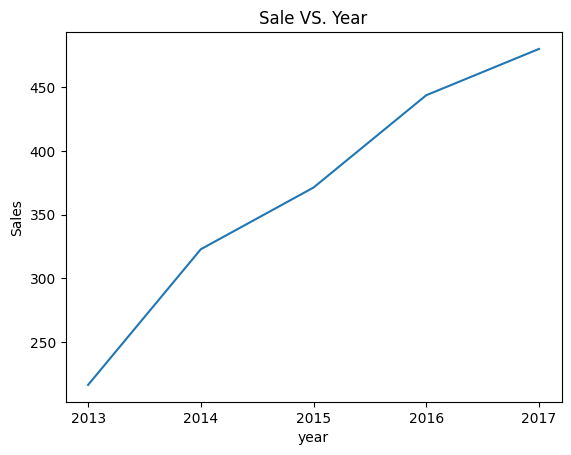

In [1062]:
df_train.groupby('year').sales.mean().sort_index().plot();
plt.title("Sale VS. Year");
plt.ylabel("Sales");
plt.xticks(np.sort(df_train.year.unique()))
plt.show()

parece muito uma funcao linear

agora uma vendas por dias na semana

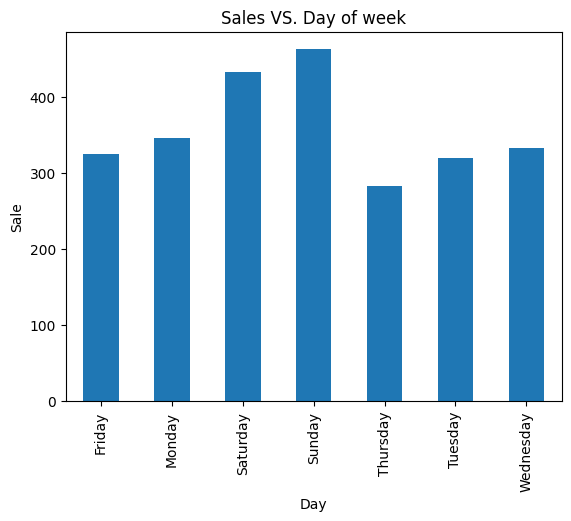

In [1063]:
df_train.groupby('day_name').sales.mean().plot(kind='bar');
plt.title("Sales VS. Day of week")
plt.xlabel("Day")
plt.ylabel("Sale")
plt.show()

como esperado, sabado e domingo vende mais

um grafico agora do preco de petroleo por ano

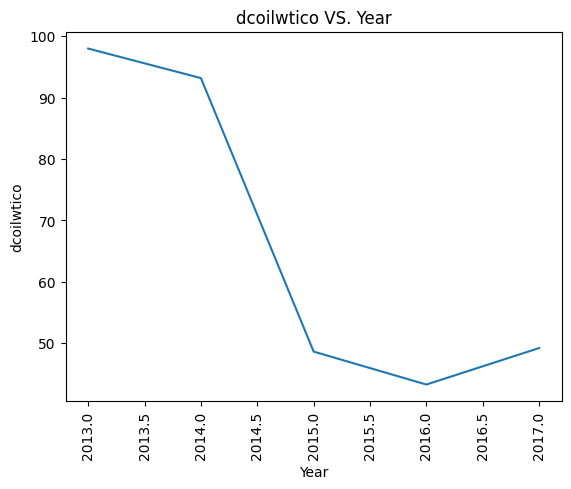

In [1064]:
oil.groupby('year').dcoilwtico.mean().sort_index().plot()
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel('dcoilwtico')
plt.title("dcoilwtico VS. Year")
plt.show()

queda brusca em 2015

Dando merge com o store

In [1065]:
train_df=df_train.merge(stores,on='store_nbr')
test_df=df_test.merge(stores,on='store_nbr')

In [1066]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'month',
       'year', 'day_name', 'day', 'city', 'state', 'type', 'cluster'],
      dtype='object')

In [1067]:
input_cols=['id','store_nbr','family','onpromotion','month','year','day_name','city','state']
target_col=['sales']

In [1068]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13


criando treino e teste

In [1069]:
# Train
inputs=train_df[input_cols].copy()
target=train_df[target_col].copy()

# Test
test_inputs=test_df[input_cols].copy()

separando colunas numericas e categoricas

In [1070]:
numeric_cols=inputs.select_dtypes(np.number).columns.tolist()
categorical_cols=inputs.select_dtypes('O').columns.tolist()

escalonando as colunas numericas

In [1071]:
scaler=StandardScaler()
scaler.fit(train_df[numeric_cols])

StandardScaler()

In [1072]:
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

codificando colunas categoricas

In [1073]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [1074]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [1075]:
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

In [1076]:
X=inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [1077]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,target,test_size=0.2,random_state=42)

usando regressao linear

In [1078]:
linear= LinearRegression().fit(X_train1,y_train1)
linear.score(X_test1,y_test1)

0.5661779449291728

vamos incluir o preco do petroleo agora

In [1079]:
oil = oil.set_index('date').dcoilwtico.interpolate(method='linear').to_frame()

In [1080]:
oil['date_str'] = oil.index.astype(str)

In [1081]:
oil.head()

,dcoilwtico,date_str
date,,
2013-01-02,93.14,2013-01-02
2013-01-03,92.97,2013-01-03
2013-01-04,93.12,2013-01-04
2013-01-07,93.20,2013-01-07
2013-01-08,93.21,2013-01-08


In [1082]:
train_df['date_str'] = train_df.date.astype(str)

train_df = pd.merge(train_df,oil,how='left',on='date_str')
train_df.drop(columns='date_str',axis=1,inplace=True)


In [1083]:
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
5,5,2013-01-01,1,BREAD/BAKERY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
6,6,2013-01-01,1,CELEBRATION,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
7,7,2013-01-01,1,CLEANING,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
8,8,2013-01-01,1,DAIRY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN
9,9,2013-01-01,1,DELI,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,NaN


In [1084]:
test_df['date_str'] = test_df.date.astype(str)
test_df = pd.merge(test_df, oil, how='left', on='date_str')
test_df.drop(columns='date_str', axis=1, inplace=True)


In [1085]:
test_df.head()

,id,date,store_nbr,family,onpromotion,month,year,day_name,day,city,state,type,cluster,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80
1,3000889,2017-08-16,1,BABY CARE,0,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80
2,3000890,2017-08-16,1,BEAUTY,2,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80
4,3000892,2017-08-16,1,BOOKS,0,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80


In [1086]:
train_df.shape

(3000888, 15)

In [1087]:
train_df.isna().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
month               0
year                0
day_name            0
day                 0
city                0
state               0
type                0
cluster             0
dcoilwtico     928422
dtype: int64

In [1088]:
test_df.isna().sum()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
month             0
year              0
day_name          0
day               0
city              0
state             0
type              0
cluster           0
dcoilwtico     7128
dtype: int64

muitas linhas sem valores

preenchendo valores vazios com a media

In [1089]:
mean_value = train_df['dcoilwtico'].mean() 
train_df.fillna(value=mean_value, inplace=True) 

In [1090]:
mean_value = test_df['dcoilwtico'].mean() 
test_df.fillna(value=mean_value, inplace=True) 

In [1091]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93
1,1,2013-01-01,1,BABY CARE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93
2,2,2013-01-01,1,BEAUTY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93
3,3,2013-01-01,1,BEVERAGES,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93
4,4,2013-01-01,1,BOOKS,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93


In [1092]:
test_df.head()

,id,date,store_nbr,family,onpromotion,month,year,day_name,day,city,state,type,cluster,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80
1,3000889,2017-08-16,1,BABY CARE,0,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80
2,3000890,2017-08-16,1,BEAUTY,2,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80
4,3000892,2017-08-16,1,BOOKS,0,8,2017,Wednesday,16,Quito,Pichincha,D,13,46.80


repetindo o procedimento anterior para treinar

In [1093]:
input_cols=['id','store_nbr','family','onpromotion','month','year','day_name','city','state', 'dcoilwtico']
target_col=['sales']

In [1094]:
# Train
inputs=train_df[input_cols].copy()
target=train_df[target_col].copy()

# Test
test_inputs=test_df[input_cols].copy()

In [1095]:
numeric_cols=inputs.select_dtypes(np.number).columns.tolist()
categorical_cols=inputs.select_dtypes('O').columns.tolist()

In [1096]:
scaler=StandardScaler()
scaler.fit(train_df[numeric_cols])

StandardScaler()

In [1097]:
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [1098]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [1099]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [1100]:
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

In [1101]:
X=inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [1102]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,target,test_size=0.2,random_state=42)

In [1103]:
linear= LinearRegression().fit(X_train1,y_train1)
linear.score(X_test1,y_test1)

0.5661724443263348

### botando agora os feriados

In [1104]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred,month,year,day,day_date
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,3,2012,Friday,2
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,4,2012,Sunday,1
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,4,2012,Thursday,12
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,4,2012,Saturday,14
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,4,2012,Saturday,21


In [1105]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93
1,1,2013-01-01,1,BABY CARE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93
2,2,2013-01-01,1,BEAUTY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93
3,3,2013-01-01,1,BEVERAGES,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93
4,4,2013-01-01,1,BOOKS,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93


In [1106]:
holidays_events = holidays_events.set_index('date')
holidays_events['date_str'] = holidays_events.index.astype(str)


In [1107]:
train_df['date_str'] = train_df.date.astype(str)

train_df = pd.merge(train_df,holidays_events,how='left',on='date_str')
train_df.drop(columns='date_str',axis=1,inplace=True)

In [1108]:
test_df['date_str'] = test_df.date.astype(str)
test_df = pd.merge(test_df, holidays_events, how='left', on='date_str')
test_df.drop(columns='date_str', axis=1, inplace=True)

In [1109]:
holidays_events.head(10)

,type,locale,locale_name,description,transferred,month,year,day,day_date,date_str
date,,,,,,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,3,2012,Friday,2,2012-03-02
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,4,2012,Sunday,1,2012-04-01
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,4,2012,Thursday,12,2012-04-12
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,4,2012,Saturday,14,2012-04-14
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,4,2012,Saturday,21,2012-04-21
2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False,5,2012,Saturday,12,2012-05-12
2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False,6,2012,Saturday,23,2012-06-23
2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,6,2012,Monday,25,2012-06-25
2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,6,2012,Monday,25,2012-06-25


In [1110]:
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,month_x,year_x,day_name,day_x,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,month_y,year_y,day_y,day_date
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
1,1,2013-01-01,1,BABY CARE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
2,2,2013-01-01,1,BEAUTY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
3,3,2013-01-01,1,BEVERAGES,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
4,4,2013-01-01,1,BOOKS,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
5,5,2013-01-01,1,BREAD/BAKERY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
6,6,2013-01-01,1,CELEBRATION,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
7,7,2013-01-01,1,CLEANING,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
8,8,2013-01-01,1,DAIRY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00
9,9,2013-01-01,1,DELI,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False,1.00,2013.00,Tuesday,1.00


In [1111]:
train_df = train_df.drop(columns=['month_y', 'year_y', 'day_y', 'day_date'])
test_df = test_df.drop(columns=['month_y', 'year_y', 'day_y', 'day_date'])


In [1112]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,month_x,year_x,day_name,day_x,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.00,0,1,2013,Tuesday,1,Quito,Pichincha,D,13,67.93,Holiday,National,Ecuador,Primer dia del ano,False


In [1113]:
input_cols=['id','store_nbr','family','onpromotion','month_x','year_x','day_name','city','state', 'dcoilwtico','type_y']
target_col=['sales']

In [1114]:
# Train
inputs=train_df[input_cols].copy()
target=train_df[target_col].copy()

# Test
test_inputs=test_df[input_cols].copy()

In [1115]:
numeric_cols=inputs.select_dtypes(np.number).columns.tolist()
categorical_cols=inputs.select_dtypes('O').columns.tolist()

In [1116]:
scaler=StandardScaler()
scaler.fit(train_df[numeric_cols])

StandardScaler()

In [1117]:
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [1118]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [1119]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [1120]:
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

In [1121]:
X=inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [1122]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,target,test_size=0.2,random_state=42)

In [1123]:
linear= LinearRegression().fit(X_train1,y_train1)
linear.score(X_test1,y_test1)


0.5731008782036776


houve uma boa melhora botando os feriados

testando outro metodo

In [1124]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=8)
model.fit(X_train1, y_train1, eval_set=[(X_test1, y_test1)], early_stopping_rounds=50, verbose=False)

c:\Users\thiag\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1130]:
y_pred = model.predict(X_test)

In [1131]:
submission['sales'] = y_pred
submission.to_csv("submission.csv",index=False)

Score de 1.18712 pro XGB no kaggle, contra 2,14347 pro linear, uma boa melhora